<a href="https://colab.research.google.com/github/ravi8147-2005/movie-rating-prediction/blob/main/Movie_rating_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from ast import literal_eval

movies_df = pd.read_csv('tmdb_5000_movies.csv')
credits_df = pd.read_csv('tmdb_5000_credits.csv')


In [ ]:
credits_df.rename(columns={'movie_id': 'id'}, inplace=True)
merged_df = movies_df.merge(credits_df, on='id')

merged_df['genres'] = merged_df['genres'].apply(lambda x: [i['name'] for i in literal_eval(x)])


In [ ]:
def get_top_cast(cast_str):
    cast_list = literal_eval(cast_str)
    return [actor['name'] for actor in cast_list[:3]]
merged_df['top_cast'] = merged_df['cast'].apply(get_top_cast)

def get_director(crew_str):
    crew_list = literal_eval(crew_str)
    for crew in crew_list:
        if crew['job'] == 'Director':
            return crew['name']
    return None
merged_df['director'] = merged_df['crew'].apply(get_director)

merged_df.to_csv('cleaned_movies.csv', index=False)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("cleaned_movies_fixed_clean.csv")

df = df[['genres', 'top_cast', 'director', 'budget', 'runtime', 'popularity', 'vote_average']]

df.fillna('', inplace=True)

df['combined_text'] = df['genres'] + ' ' + df['top_cast'] + ' ' + df['director']

vectorizer = CountVectorizer(max_features=1000)
text_features = vectorizer.fit_transform(df['combined_text']).toarray()

numeric_features = df[['budget', 'runtime', 'popularity']].values

X = np.hstack((text_features, numeric_features))

y = df['vote_average'].values

print("✅ Feature matrix shape:", X.shape)
print("✅ Target shape:", y.shape)


<ipython-input-34-2053248630>:6: DtypeWarning: Columns (0,2,4,7,8,11,12,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,2

✅ Feature matrix shape: (4839, 1003)
✅ Target shape: (4839,)


In [ ]:
with open("cleaned_movies_fixed_clean.csv", 'r', encoding='utf-8', errors='ignore') as f:
    lines = f.readlines()

clean_lines = [line for line in lines if line.count('"') % 2 == 0]

with open("cleaned_movies.csv", 'w', encoding='utf-8') as f:
    f.writelines(clean_lines)

df = pd.read_csv("cleaned_movies.csv")


<ipython-input-36-1531030192>:10: DtypeWarning: Columns (0,2,4,7,8,11,12,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,

In [ ]:

for col in ['budget', 'runtime', 'popularity']:
    non_numeric = df[~df[col].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
    if not non_numeric.empty:
        print(f"⚠️ Non-numeric values found in '{col}':")
        print(non_numeric[[col]])


In [ ]:
for col in ['budget', 'runtime', 'popularity']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[['budget', 'runtime', 'popularity']] = df[['budget', 'runtime', 'popularity']].fillna(0)


In [ ]:
print("Unique values in vote_average:")
print(df['vote_average'].unique()[:20])


Unique values in vote_average:
['7.2' '6.9' '6.3' '7.6' '6.1' '5.9' '7.4' '7.3' '5.7' '5.4' '7' '6.5'
 '6.4' '6.2' '7.1' '5.8' '6.6' '7.5' '5.5' '6.7']


In [ ]:
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

df = df.dropna(subset=['vote_average'])

y = df['vote_average'].values


In [ ]:
df[['genres', 'director', 'top_cast']] = df[['genres', 'director', 'top_cast']].fillna('')

df['combined_text'] = df['genres'] + ' ' + df['director'] + ' ' + df['top_cast']

text_features = vectorizer.transform(df['combined_text']).toarray()



In [ ]:
text_features = vectorizer.transform(df['combined_text']).toarray()
numeric_features = df[['budget', 'runtime', 'popularity']].values
X = np.hstack((text_features, numeric_features))

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ R² Score:", r2_score(y_test, y_pred))
print("✅ Mean Squared Error:", mean_squared_error(y_test, y_pred))


✅ R² Score: 0.15073608914585745
✅ Mean Squared Error: 1.2805518840509909


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

print("🌲 R² Score (Random Forest):", r2_score(y_test, y_rf_pred))
print("🌲 Mean Squared Error:", mean_squared_error(y_test, y_rf_pred))


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


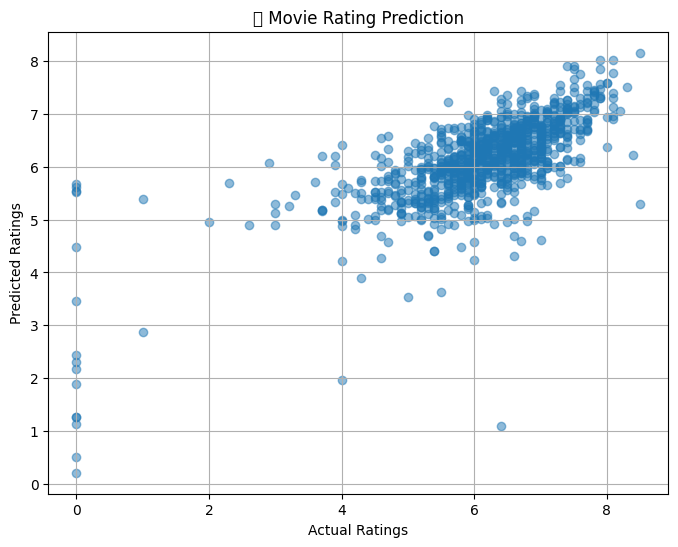

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("🎬 Movie Rating Prediction")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print("R² Score:", r2_score(y_test, y_rf_pred))
print("MSE:", mean_squared_error(y_test, y_rf_pred))


R² Score: 0.5066156459080107
MSE: 0.7439433798126951


In [ ]:
valid_indices = y_test > 0
y_test = y_test[valid_indices]
y_rf_pred = y_rf_pred[valid_indices]
